In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers

import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float64
(10000, 784) float64


In [5]:
print(y_train.shape, y_train[:10])
print(y_test.shape, y_test[:10])

(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


In [15]:
fig, axes = plt.subplot()

ValueError: Single argument to subplot must be a three-digit integer, not 6

<Figure size 640x480 with 0 Axes>

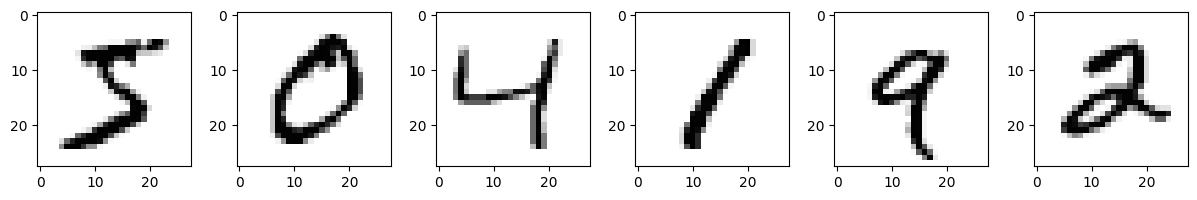

In [18]:
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
    ax.imshow(img.reshape(28, 28), cmap='Grays')
plt.show()

In [ ]:
# можно настроить GPU
# tf.config.list_physical_devices('GPU')

In [21]:
model = Sequential([
    layers.InputLayer((28*28,)),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
])

In [24]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = optimizers.Adam(),
    metrics = ['accuracy']
)

In [26]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=1024
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7717 - loss: 0.8475 - val_accuracy: 0.9403 - val_loss: 0.1999
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9503 - loss: 0.1726 - val_accuracy: 0.9623 - val_loss: 0.1261
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9687 - loss: 0.1099 - val_accuracy: 0.9697 - val_loss: 0.0998
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9786 - loss: 0.0755 - val_accuracy: 0.9743 - val_loss: 0.0846
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9840 - loss: 0.0570 - val_accuracy: 0.9764 - val_loss: 0.0759
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9874 - loss: 0.0445 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9915 - loss: 0.0317 - val_accuracy: 0.9787 - val_loss: 0.0659
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9938 - loss: 0.0246 - val_accuracy: 0.9803 - v

Callback

In [30]:
from tensorflow.keras.callbacks import *

ModelCheckpoint('models/best_model.keras', monitor='val_accuracy', 
                verbose=1, mode='max', save_best_only=True)

In [ ]:
# обучние прекращается, если val_loss не падает в течение 5 эпох
EarlyStopping(monitor='val_loss', patience=5)

1. TerminateOnNan() <br>
Обучение прекращается, если loss = NaN. Причины:
* слишком высокий Learning rate
* отсутствие нормализации входных данных
* NaN во входных данных
* ошибка в архитектуре сети

2. LambdaCallback(on_epoch_end=lambda epoch, logs:)